In [9]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# 현재 경로 확인
!pwd

/content


In [11]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

/content/drive/My Drive/Colab Notebooks


## Computer Vision Footprint

```
1998 - LeNet 5
2012 - AlexNet 
     - Gradient vanishin문제를 해결하는 ReLU를 사용 
     - LRN 사용 안했음
     - Overlapping Pooling(영향력이 크진 않음) 
     - Dropout(Overfitting 방지)  
2013 - ZFNet 
     - AlexNet을 Visualization통해 insight를 제공
     - HyperParameter tuning 방법론 제시  
     
     - Network in Network 
     - 1x1 Convolution 도입 (1. 차원 조절 2. non-linear 특성 부여 3. fully connected 처럼 사용)
     - Flatten 대신 사용하는 방법인 Global Average Pooling 도입  
     - 같은 형태를 반복하고 겹쳐서 사용하는 Stacking 도입  
2014 - GoogLeNet v1 (1등)
     - 1x1 convolution 활용
     - Inception module stacking 
     - Global average pooling 활용 

     - VGG (2등) 
2015 - ResNet 
     - 최초로 인간을 뛰어 넘는 성능을 보여준 알고리즘 
     - 잔차(Residual)을 최소로 하는 방향으로 학습
     - Batch Normalization 활용     
2016 - GoogLeNet v4
```

## Deep Residual Learning for Image Recognition

> ResNet은 인간을 뛰어넘은 첫번째 모델 <br>
> Residual => 실제값 - 예측값 (잔차) 

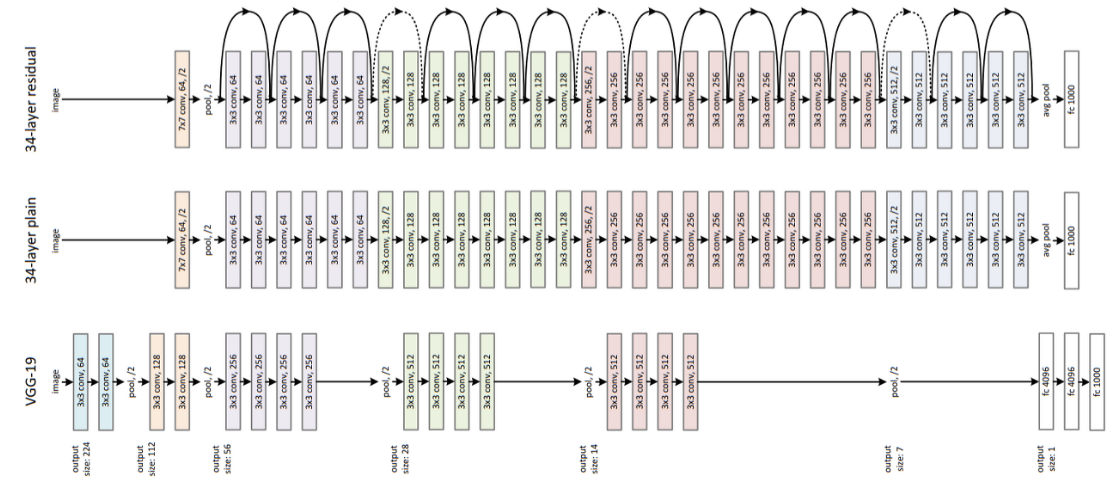

```
차원이 증가할 때 점선 화살표로 표시했다 
```

## Skip connection

> deep architectures에서 short skip connections은 하나의 layer의 output을 몇 개의 layer를 건너뛰고 다음 layer의 input에 추가하는 것

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
input_ = tf.keras.Input((32,32,3))
x = tf.keras.layers.Conv2D(2,3, padding='same')(input_)
y = tf.keras.layers.Conv2D(2,3, padding='same')(input_)
z = tf.keras.layers.Concatenate()([x,y]) # 구조 자체를 더해준다 
model = tf.keras.models.Model(input_, z)

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 2)    56          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 2)    56          input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 32, 32, 4)    0           conv2d[0][0]                     
                                                                 conv2d_1[0][0]               

In [5]:
# ReNet에서 구현하는 방식 (Add)
input_ = tf.keras.Input((32,32,3))
x = tf.keras.layers.Conv2D(2,3, padding='same')(input_)
y = tf.keras.layers.Conv2D(2,3, padding='same')(input_)
z = tf.keras.layers.Add()([x,y]) # 값을 더해준다 (element wise)
model = tf.keras.models.Model(input_, z)

In [6]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 2)    56          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 2)    56          input_2[0][0]                    
__________________________________________________________________________________________________
add (Add)                       (None, 32, 32, 2)    0           conv2d_2[0][0]                   
                                                                 conv2d_3[0][0]             

## 실전 예제 

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

(array([5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
        5000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

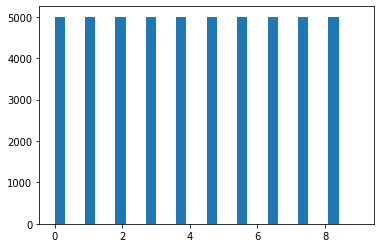

In [6]:
plt.hist(y_train, width=0.3) # 데이터 클래스가 균등한지 확인 

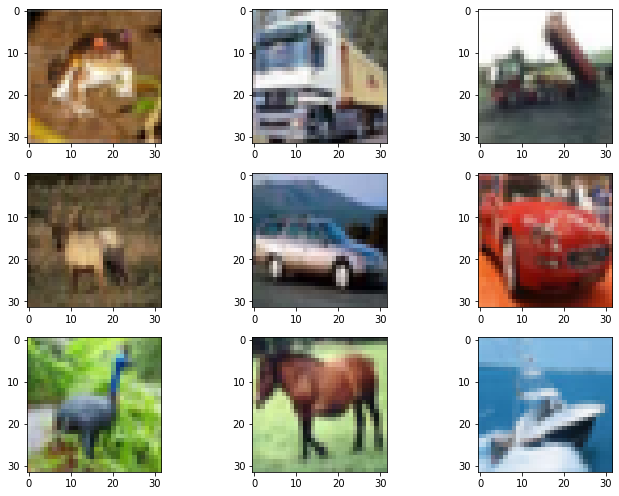

In [36]:
# 비율과 크기가 다르다 => 전통적인 ml방식으로는 해결할 수 없다 => CNN으로 해결해야 한다 
rows = 3
cols = 3
axes=[]
fig=plt.figure(figsize=(10,7))

for a in range(rows*cols):    
    axes.append(fig.add_subplot(rows, cols, a+1))
    plt.imshow(X_train[a])
fig.tight_layout()    
plt.show()

In [8]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

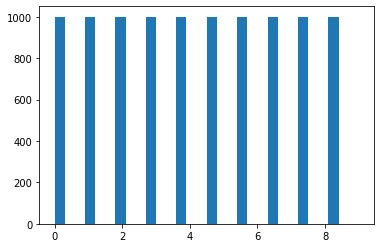

In [9]:
plt.hist(y_test, width=0.3)

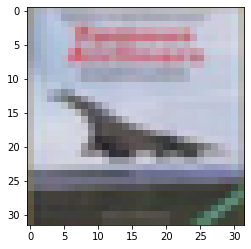

In [10]:
plt.imshow(X_test[3]) # data image크기가 작기 때문에 deep한 layer를 사용하기 힘들다 

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train / 255
X_test = X_test / 255 

In [3]:
# layer를 구성하는 것은 만드는 사람에 따라 달라질 수 있다 

input_ = tf.keras.Input((32,32,3))
x = tf.keras.layers.Conv2D(32,3)(input_)
# x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPool2D(2)(x) # 2x2 stride 2 
x = tf.keras.layers.Conv2D(64,3)(x) 
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPool2D(2)(x) 
x = tf.keras.layers.Conv2D(64,3)(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Flatten()(x) # 이미지 크기가 작기때문에 flatten해도 상관없다 
x = tf.keras.layers.Dense(512)(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dense(10)(x)

In [4]:
model = tf.keras.models.Model(input_, x)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
re_lu (ReLU)                 (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0     

In [6]:
# 사용자가 해석한 값이 아닌 raw값 그대로 loss를 구한다 / Numerical stability가 더 좋기 때문에 거의 차이가 안난다 
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                                                                 optimizer='adam',
                                                                 metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test)) # 정규화 했을 때 더 낮은 loss에서 시작한다 그리고 정규화를 했을 때 수렴속도가 빠르다 

Epoch 1/20
1563/1563 [==============================] - 14s 8ms/step - loss: 1.4378 - accuracy: 0.4767 - val_loss: 1.1393 - val_accuracy: 0.5892
Epoch 2/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0637 - accuracy: 0.6254 - val_loss: 1.0237 - val_accuracy: 0.6401
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8987 - accuracy: 0.6826 - val_loss: 0.9170 - val_accuracy: 0.6825
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7807 - accuracy: 0.7277 - val_loss: 0.8540 - val_accuracy: 0.7036
Epoch 5/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6769 - accuracy: 0.7609 - val_loss: 0.8615 - val_accuracy: 0.7131
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5830 - accuracy: 0.7932 - val_loss: 0.8833 - val_accuracy: 0.7151
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4926 - accuracy: 0.8251 - val_loss: 0.9074 - val_ac

In [8]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test)) # 정규화 하지 않았을 때 더 높은 loss에서 시작한다 

Epoch 1/20
1563/1563 [==============================] - 19s 8ms/step - loss: 2.0055 - accuracy: 0.3065 - val_loss: 1.5826 - val_accuracy: 0.4172
Epoch 2/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4448 - accuracy: 0.4833 - val_loss: 1.3306 - val_accuracy: 0.5283
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2506 - accuracy: 0.5596 - val_loss: 1.2615 - val_accuracy: 0.5648
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1343 - accuracy: 0.6053 - val_loss: 1.2301 - val_accuracy: 0.5752
Epoch 5/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0247 - accuracy: 0.6427 - val_loss: 1.1291 - val_accuracy: 0.6128
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9380 - accuracy: 0.6753 - val_loss: 1.2271 - val_accuracy: 0.5985
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8566 - accuracy: 0.7020 - val_loss: 1.1887 - val_ac

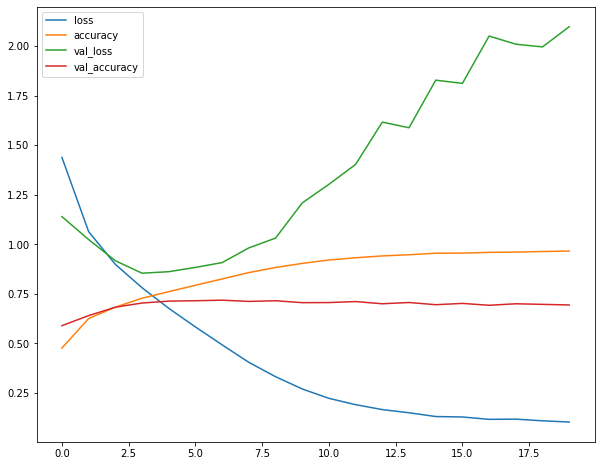

In [8]:
pd.DataFrame(history.history).plot.line(figsize=(10,8)) # validation loss가 증가하는 지점부터 overfitting이 시작된다 (정규화)

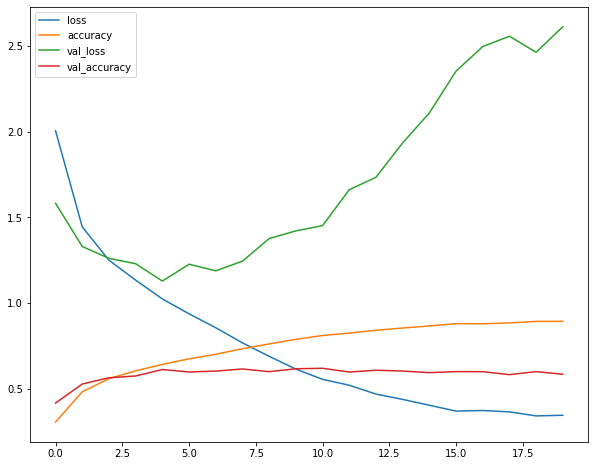

In [12]:
pd.DataFrame(history.history).plot.line(figsize=(10,8)) # validation loss가 증가하는 지점부터 overfitting이 시작된다 (정규화 X)

## Flower Datasets 

In [13]:
tf.keras.utils.get_file("flower_photos","https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz")

228827136/228813984 [==============================] - 3s 0us/step


'/root/.keras/datasets/flower_photos'

In [15]:
data = tf.keras.preprocessing.image_dataset_from_directory('flower_photos/') 

Found 3670 files belonging to 5 classes.


In [16]:
data # tf.data.Dataset

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [19]:
idg = tf.keras.preprocessing.image.ImageDataGenerator()
idg.flow_from_directory('flower_photos/') # raw data를 클래스별로 모아 두면 한번에 바꾸는 것을 지원한다 (하나의 array로 만들어줌) 

Found 3670 images belonging to 5 classes.


## numpy와 tensor

```
Numpy와 tensor는 서로 호환이 된다 
tensor로 사용하면 호환성은 떨어지지만 gpu나 tensorflow 내부의 기능을 극대화 할 수 있다 
tf.data.Dataset는 tensor중에서 ml용으로 관리한다 
 
```

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


```python
tensor data로 만드는 방법 

1. from_tensors
2. from_tensor_slices
```

In [ ]:
tf.data.Dataset.from_tensors(X_train) # 데이터 전체를 기반으로 만들어 준다 
tf.data.Dataset.from_tensors((X_train,y_train)) # 데이터 전체를 묶어서 관리 

<TensorDataset shapes: ((50000, 32, 32, 3), (50000, 1)), types: (tf.uint8, tf.uint8)>

In [ ]:
tf.data.Dataset.from_tensor_slices(X_train) # 데이터 한 개를 기반으로 만들어 준다 
tf.data.Dataset.from_tensor_slices((X_train, y_train)) # 데이터 한쌍을 묶어서 관리 

<TensorSliceDataset shapes: ((32, 32, 3), (1,)), types: (tf.uint8, tf.uint8)>

In [26]:
# y_train = tf.keras.utils.to_categorical(y_train)
train = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)

In [30]:
train_t = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [32]:
train_t.batch(32)

<BatchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float64, tf.uint8)>

In [31]:
train_t.shuffle(400)

<ShuffleDataset shapes: ((32, 32, 3), (1,)), types: (tf.float64, tf.uint8)>

In [33]:
# cache : preprocessing 시간이 너무 길어서 줄이고 싶을때 사용
# prefetch : 학습중일때, 데이터 로드시간을 줄이기 위해 미리 메모리에 적재시킴 이때, 괄호안의 숫자는 얼마만큼 적재시킬지에 대한 숫자 / AUTOTUNE는 자동으로 
train_t.shuffle(400).cache()

<CacheDataset shapes: ((32, 32, 3), (1,)), types: (tf.float64, tf.uint8)>

In [34]:
train_t.shuffle(400).cache().prefetch(tf.data.AUTOTUNE) 

<PrefetchDataset shapes: ((32, 32, 3), (1,)), types: (tf.float64, tf.uint8)>

In [35]:
'_GeneratorState' in dir(train) # lazy하게 데이터를 불러온다 => 호출되기 전까지 메모리에 올라가지 않는다 

True

In [38]:
for i in train.take(2): # 데이터 2개 불러온다 
  print(i)

(<tf.Tensor: shape=(32, 32, 32, 3), dtype=float64, numpy=
array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 

## Naive

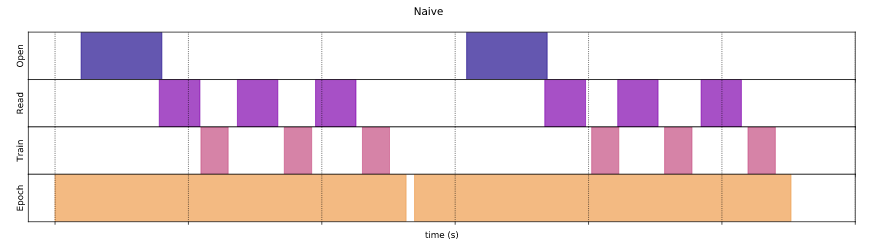

## prefetch

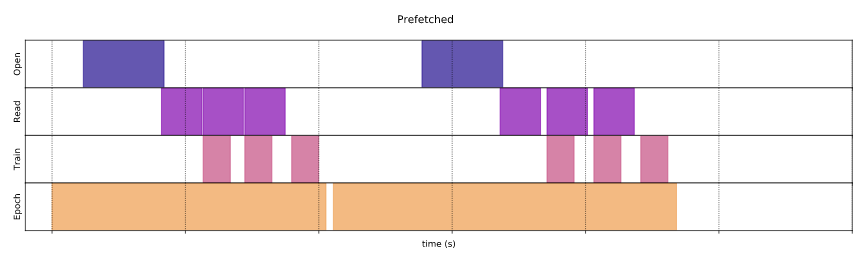

```
tf.data.Dataset을 사용하지 않으면 cpu를 읽고 쓰고하는 것을 각각 할당한다 
그런데 cache, prefetch를 사용하면 내부적으로 cpu, gpu를 압축적으로 사용할 수 있도록 처리해준다 
따라서 numpy보다 메모리를 효율적으로 사용할 수 있다 
```

In [21]:
input_ = tf.keras.Input((32,32,3))
x = tf.keras.layers.Conv2D(32,3)(input_)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPool2D(2)(x) 
x = tf.keras.layers.Conv2D(64,3)(x) 
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPool2D(2)(x) 
x = tf.keras.layers.Conv2D(64,3)(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Flatten()(x) 
x = tf.keras.layers.Dense(512)(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dense(10)(x)

In [22]:
model = tf.keras.models.Model(input_, x)

In [23]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                                                                 optimizer='adam',
                                                                 metrics=['accuracy'])

In [29]:
history = model.fit(train, epochs=10) # tf.data.Dataset으로 학습을 하면 tensor로 처리하고 내부적인 기능이 최적화되어 사용하기 때문에 훨씬 더 효율적으로 사용할 수 있다 / 메모리 효율이 좋다 

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4560 - accuracy: 0.4731
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0674 - accuracy: 0.6208
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8919 - accuracy: 0.6871
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7641 - accuracy: 0.7327
Epoch 5/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6630 - accuracy: 0.7666
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.5731 - accuracy: 0.7999
Epoch 7/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.4959 - accuracy: 0.8257
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4299 - accuracy: 0.8476
Epoch 9/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.3662 - accuracy: 0.8701
Epoch 10/10
1563/1563 [==============================] - 24s 15ms/s

In [41]:
data = tf.keras.preprocessing.image_dataset_from_directory('flower_photos/') 

Found 3670 files belonging to 5 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


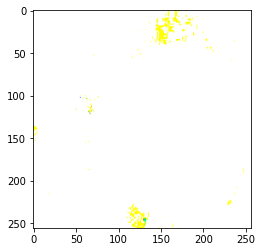

In [43]:
plt.imshow(next(iter(data.take(1)))[0][0])

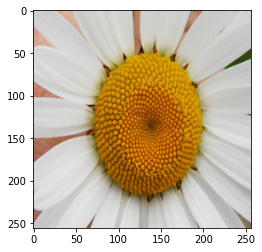

In [42]:
plt.imshow(next(iter(data.take(1)))[0][0]/255) # 255값으로 나누면 이미지의 특성을 좀 더 반영할 수 있다 

In [44]:
tf.keras.utils.image_dataset_from_directory is tf.keras.preprocessing.image_dataset_from_directorys # 같은 방법이다 

True

## Data augmentation

```
Data augmentation은 현재 갖고 있는 데이터를 좀 더 다양하게 만들어 AlexNet에서 처음 도입된 개념이다 
AlexNet에서 256x256 이미지를 224x224 크기로 무작위하게 잘라서 데이터의 수를 키웠다
(2048배 뻥튀기 되었다)  
일반적으로는 cpu기반으로 연산되지만 batch기반으로 학습될때는 gpu로 연산된다  
```

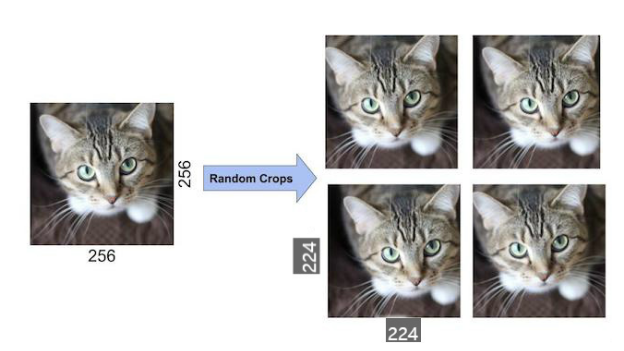

In [54]:
data = tf.keras.preprocessing.image_dataset_from_directory('flower_photos/') 
rescale = tf.keras.layers.experimental.preprocessing.RandomCrop(224,224,3)

Found 3670 files belonging to 5 classes.


In [66]:
data.map(lambda x,y: (rescale(x), y), num_parallel_calls=tf.data.AUTOTUNE) # num_parallel_calls: 동시에 cpu 몇개 사용할 것인가

<ParallelMapDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [65]:
3670*2048

7516160

## lambda layer

In [69]:
t = tf.constant([[1,2,],[3,4,]])

In [70]:
t

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [71]:
tf.keras.layers.Lambda(lambda x:x+1)(t) # layer안에 함수를 쓴다 

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [4, 5]], dtype=int32)>

In [74]:
rescale = tf.keras.layers.Lambda(lambda x:tf.image.random_crop(x, (224,224,3)))
# data.map(lambda x,y: (rescale(x), y), num_parallel_calls=tf.data.AUTOTUNE)

In [81]:
data.map(lambda x,y:(rescale(x)(),y))

ValueError: ignored